In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('final_result_updated.csv')

In [3]:
df.drop(columns=['Unnamed: 0', 'id'], inplace=True)
df.head()

,price,price/m,rooms,city,district,street,status,meters,apartment_floors,bathroom,...,market,building,material,year,adv_date,upvotes,floor,building_floors,bedroom,balcony
0,360185,4002,4,Gdańsk,Łostowice,Kryształowa,Do wykończenia,90.00,2,2,...,Pierwotny,Dom wielorodzinny,Pustak,2025,2024-03-21,766,2,2,1,Nie
1,2850000,22266,4,Sopot,Dolny,Grunwaldzka,NaN,128.00,1,1,...,Wtórny,Kamienica,Cegła,1920,2023-09-18,383,1,3,5,Nie
2,669000,16405,2,Gdynia,Redłowo,Bohaterów Starówki Warszawskiej,NaN,40.78,1,1,...,Wtórny,Blok Mieszkalny,Wielka płyta,1970,2024-02-27,309,3,9,1,Tak
3,414000,11948,2,Gdańsk,Jasień,NaN,Do wykończenia,34.65,1,1,...,Pierwotny,Blok,Wielka płyta,2023,2024-06-12,233,1,4,1,Tak
4,537365,8550,4,Gdańsk,Ujeścisko - Łostowice,NaN,Do wykończenia,62.85,1,2,...,Pierwotny,Blok,Cegła,2024,2024-06-03,230,1,3,1,Tak


## The visualization of the most important dependences known from Exploratory Data Analysis conducted in SQL

In [4]:
plt.rcParams['figure.figsize'] = [12, 10]
sns.set_style("whitegrid")
sns.set_palette(palette="viridis")

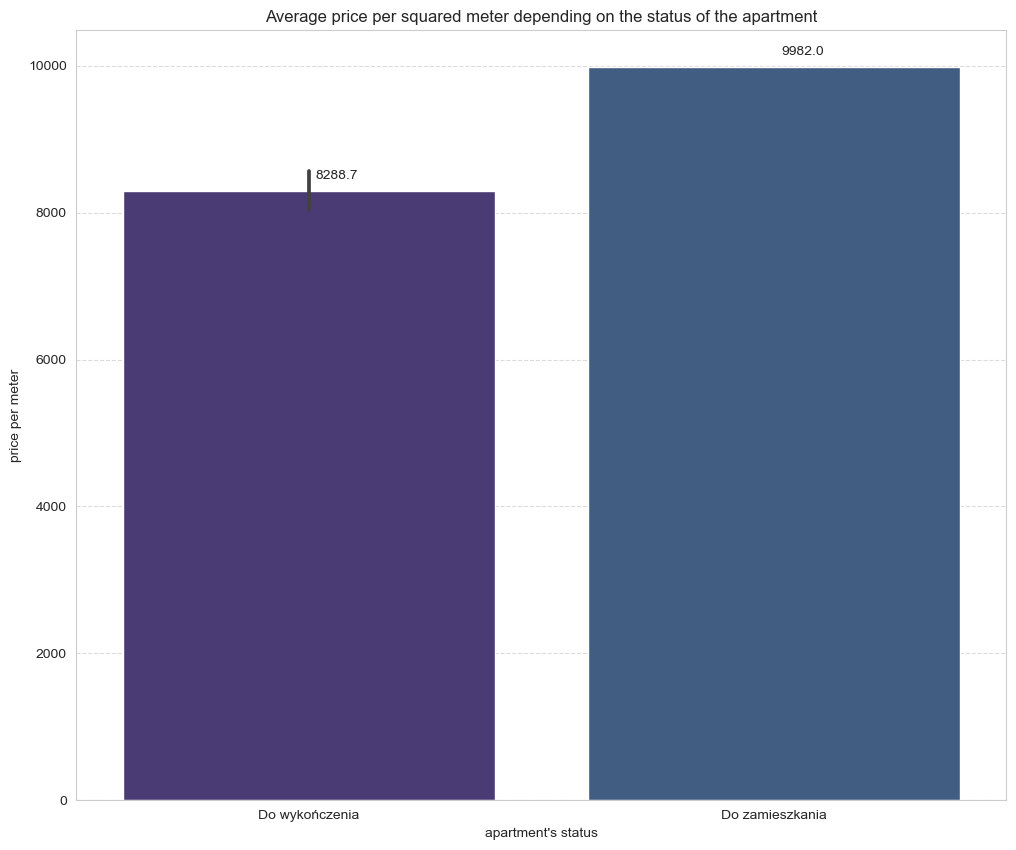

In [5]:
barplot = sns.barplot(df, x='status', y='price/m')
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.1f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()),  
                     xytext = (5, 9), 
                     textcoords = 'offset points')
plt.title('Average price per squared meter depending on the status of the apartment')
plt.xlabel("apartment's status")
plt.ylabel('price per meter')
plt.grid(axis='y', linestyle='--', alpha=0.7)

##### As expected, apartments that require additional finishing are cheaper.

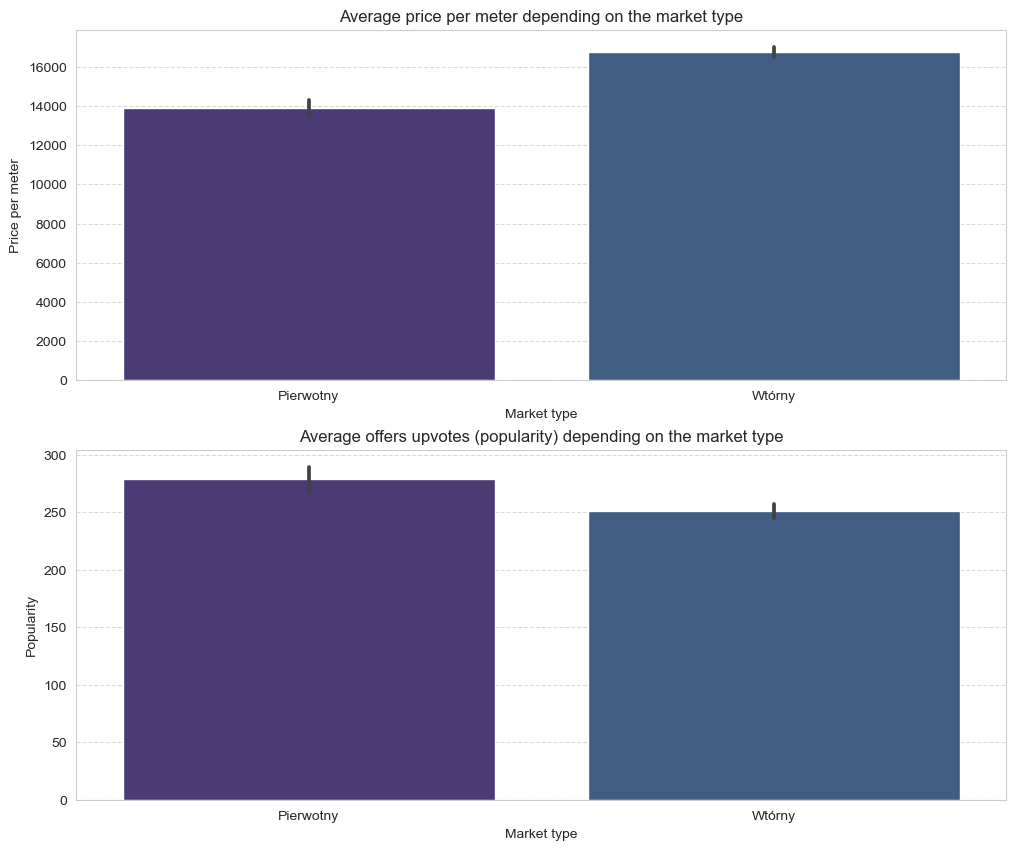

In [6]:
fig, axs = plt.subplots(2, 1)
sns.barplot(df, x='market', y='price/m', ax=axs[0])
axs[0].set_title('Average price per meter depending on the market type')
axs[0].set_xlabel('Market type')
axs[0].set_ylabel('Price per meter')
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.barplot(df, x='market', y='upvotes', ax=axs[1])
axs[1].set_title('Average offers upvotes (popularity) depending on the market type')
axs[1].set_xlabel('Market type')
axs[1].set_ylabel('Popularity')
for ax in axs:
    ax.grid(axis='y', linestyle='--', alpha=0.7)

##### On average, apartments from the primary market are cheaper than those from the secondary market. Consequently, the popularity of listings from the primary market is generally higher, which may suggest that people are more likely to search for cheaper apartments from the primary market.

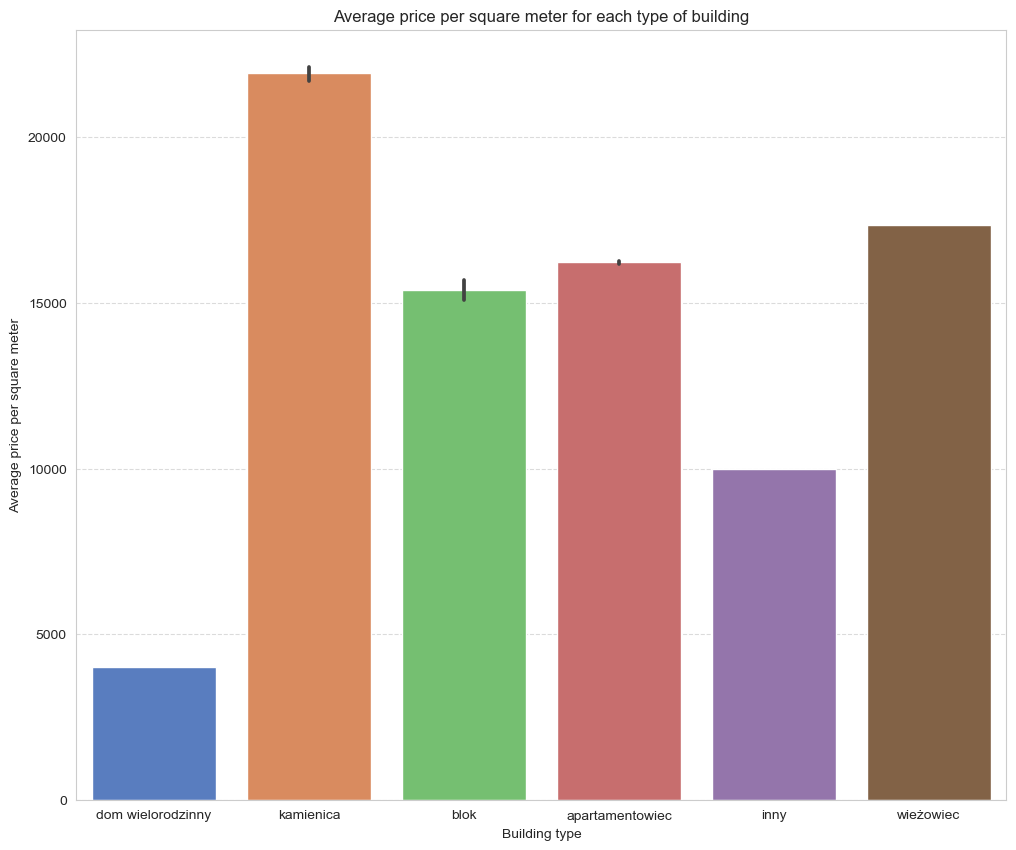

In [7]:
df['building'] = df['building'].replace('Blok Mieszkalny', 'Blok')
df['building'] = df['building'].str.lower()
sns.barplot(df, x='building', y='price/m', palette="muted")
plt.title('Average price per square meter for each type of building')
plt.ylabel('Average price per square meter')
plt.xlabel('Building type')
plt.grid(axis='y', linestyle='--', alpha=0.7)

##### The most expensive building type is townhouse

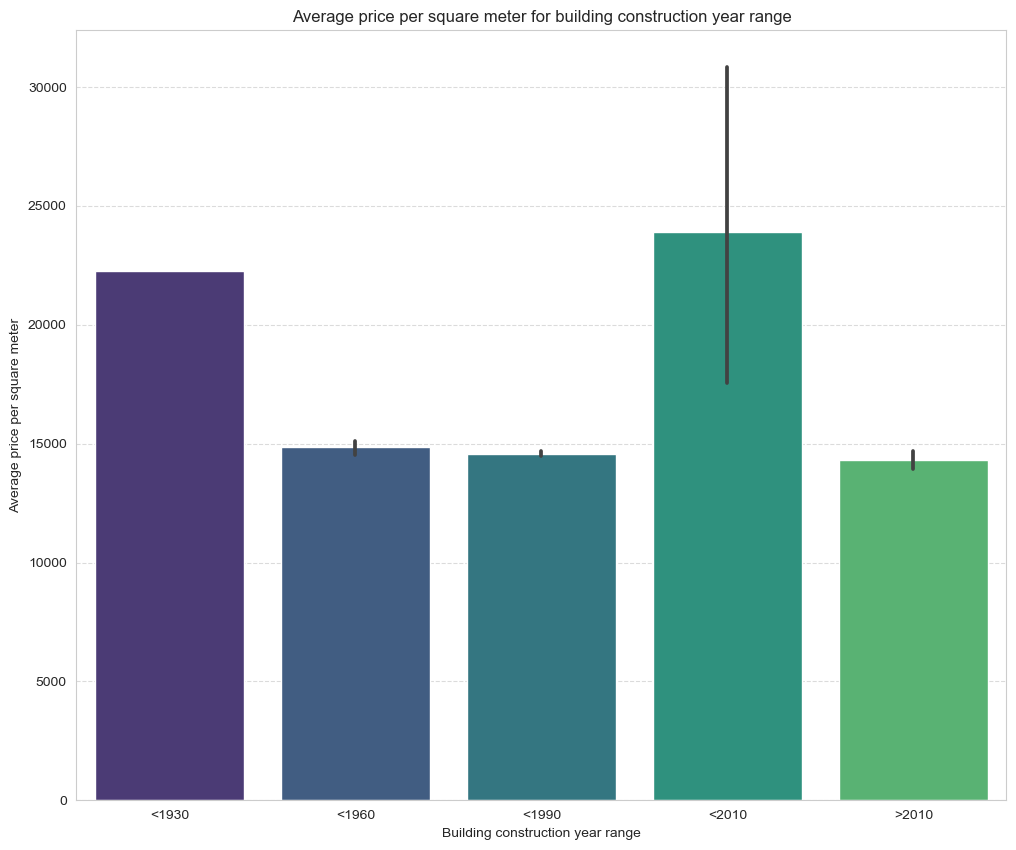

In [8]:
df['years_bins'] = pd.cut(df['year'],
                       [0,1930,1960,1990,2010,np.inf],
                       right=False,
                       labels=['<1930','<1960','<1990','<2010','>2010'])

sns.barplot(df, x='years_bins', y='price/m')
plt.title('Average price per square meter for building construction year range')
plt.ylabel('Average price per square meter')
plt.xlabel('Building construction year range')
plt.grid(axis='y', linestyle='--', alpha=0.7)

#### Some of the more expensive apartments are located in buildings built before 1930, with tenement houses being the most expensive type of construction, which aligns with this trend. The most expensive apartments are those built between 1990 and 2010.

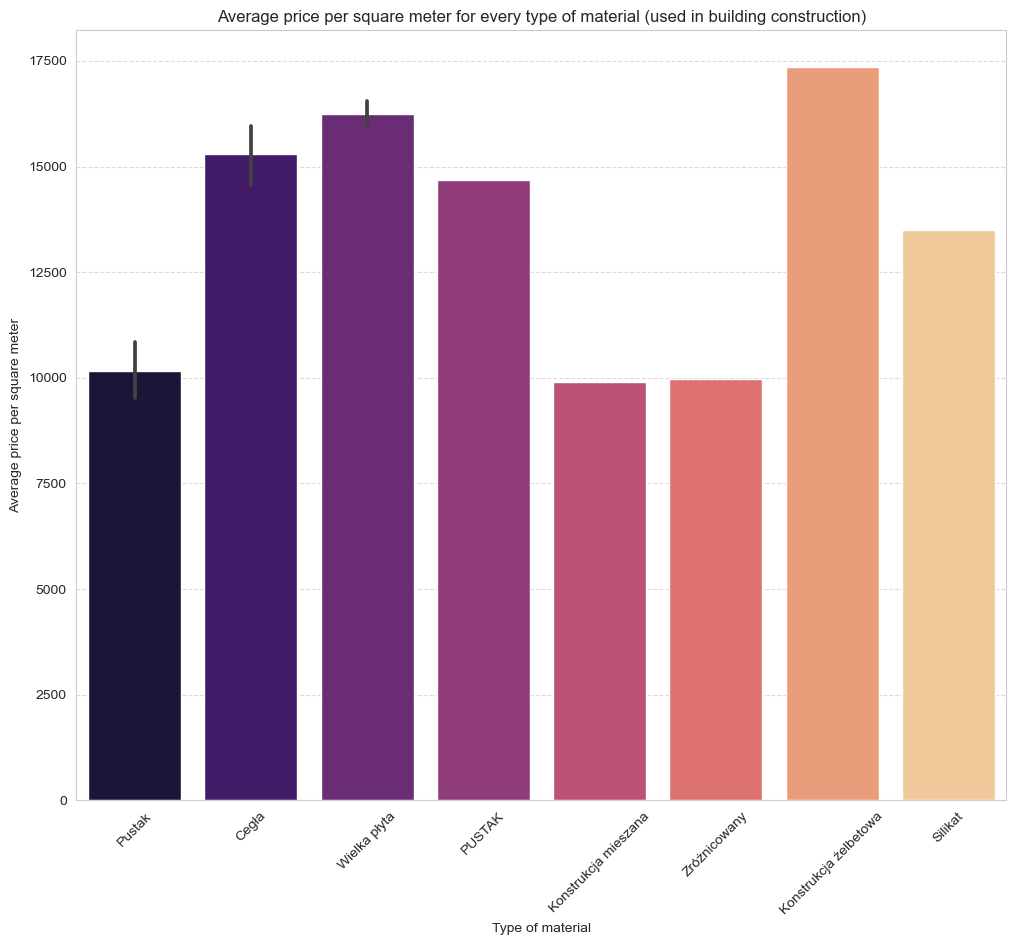

In [9]:
sns.barplot(df, x='material', y='price/m', palette="magma")
plt.xticks(rotation=45)
plt.title('Average price per square meter for every type of material (used in building construction)')
plt.xlabel('Type of material')
plt.ylabel('Average price per square meter')
plt.grid(axis='y', linestyle='--', alpha=0.7)

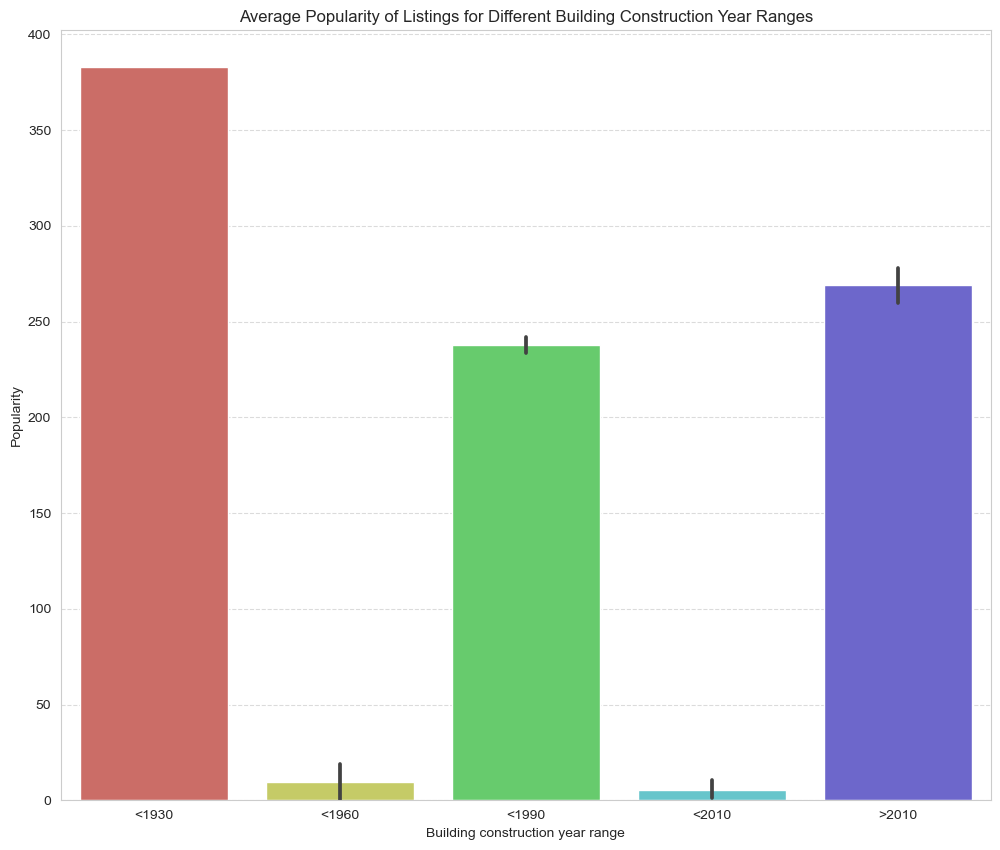

In [10]:
sns.set_palette(palette='hls')
sns.barplot(df, x='years_bins', y='upvotes')
plt.title('Average Popularity of Listings for Different Building Construction Year Ranges')
plt.xlabel('Building construction year range')
plt.ylabel('Popularity')
plt.grid(axis='y', linestyle='--', alpha=0.7)

##### The most popular listings in the examined dataset turn out to be among the oldest buildings, which are also more expensive offerings (as previous analysis has shown), suggesting that

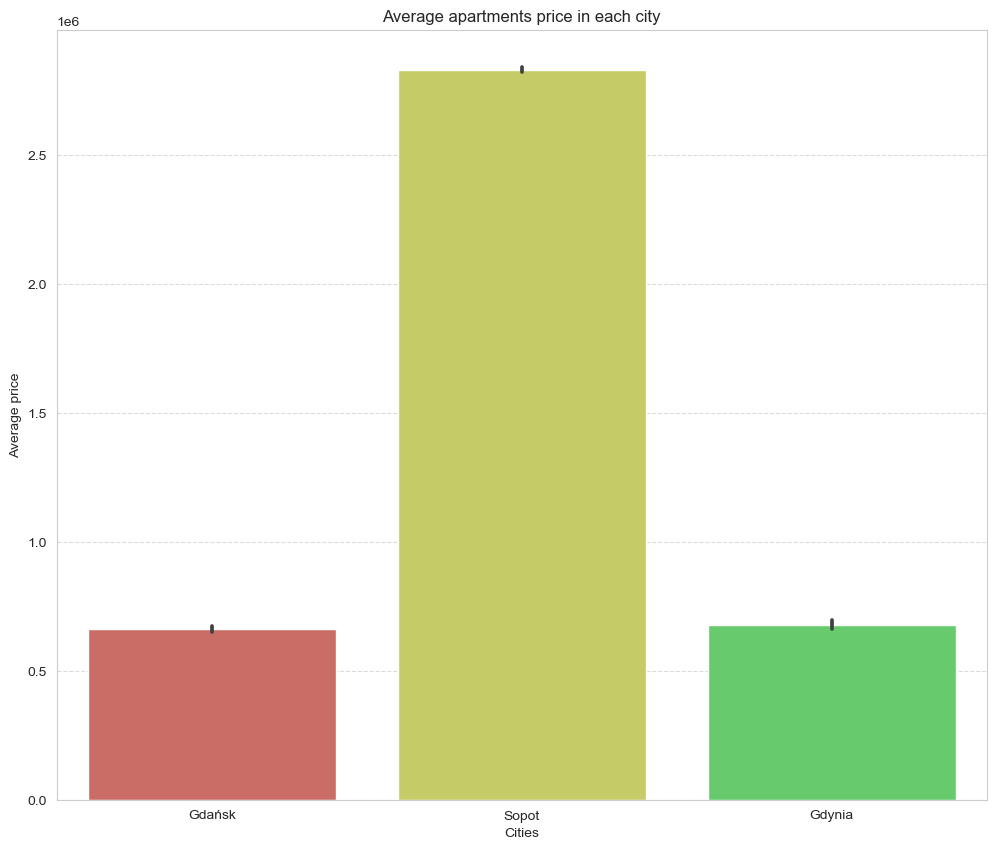

In [11]:
sns.barplot(df, x='city', y='price')
plt.title('Average apartments price in each city')
plt.xlabel('Cities')
plt.ylabel('Average price')
plt.grid(axis='y', linestyle='--', alpha=0.7)

##### On average price in Gdańsk and Gdynia is similiar and a lot lower than price in Sopot

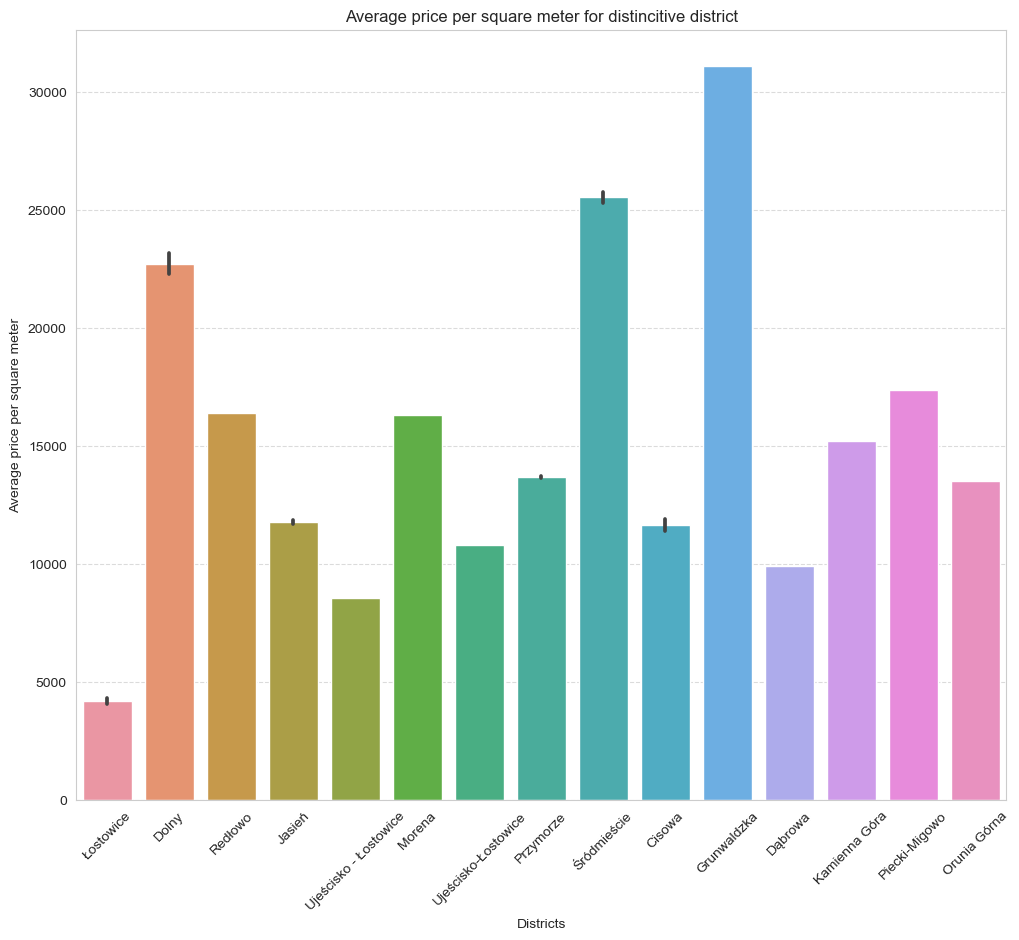

In [12]:
sns.barplot(df, x='district', y='price/m')
plt.xticks(rotation=45)
plt.title('Average price per square meter for distincitive district')
plt.xlabel('Districts')
plt.ylabel('Average price per square meter')
plt.grid(axis='y', linestyle='--', alpha=0.7)

##### The highest price per square meter is found in districts ranked as follows: Grunwaldzka (Sopot), Śródmieście (Gdańsk), and Dolny Sopot. The cheapest districts are: Ujeścisko-Łostowice, Dąbrowa, and Łostowice.

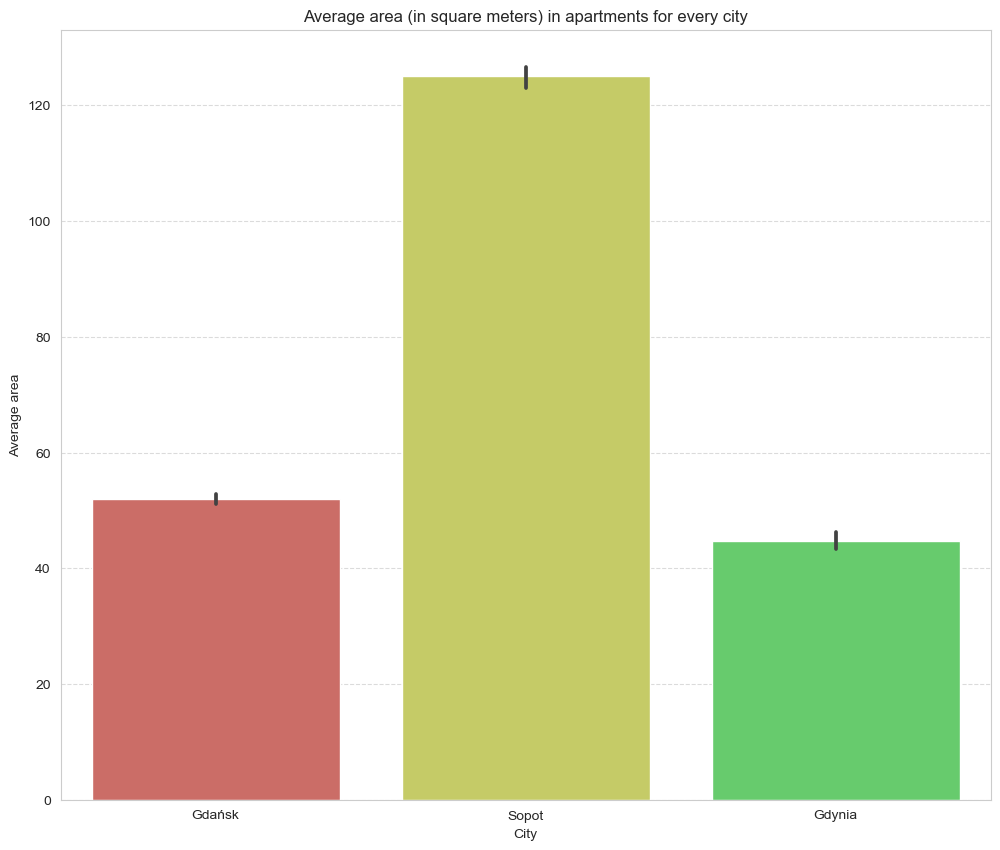

In [13]:
sns.barplot(df, y='meters', x='city')
plt.title('Average area (in square meters) in apartments for every city')
plt.xlabel('City')
plt.ylabel('Average area')
plt.grid(axis='y', linestyle='--', alpha=0.7)

##### The average apartment size in Gdańsk and Gdynia is comparable, but in Sopot, it is noticeably larger. The graph is very similar to the one depicting the overall average apartment prices in these cities. A similar distribution of square meters across cities results in a similar distribution of prices.

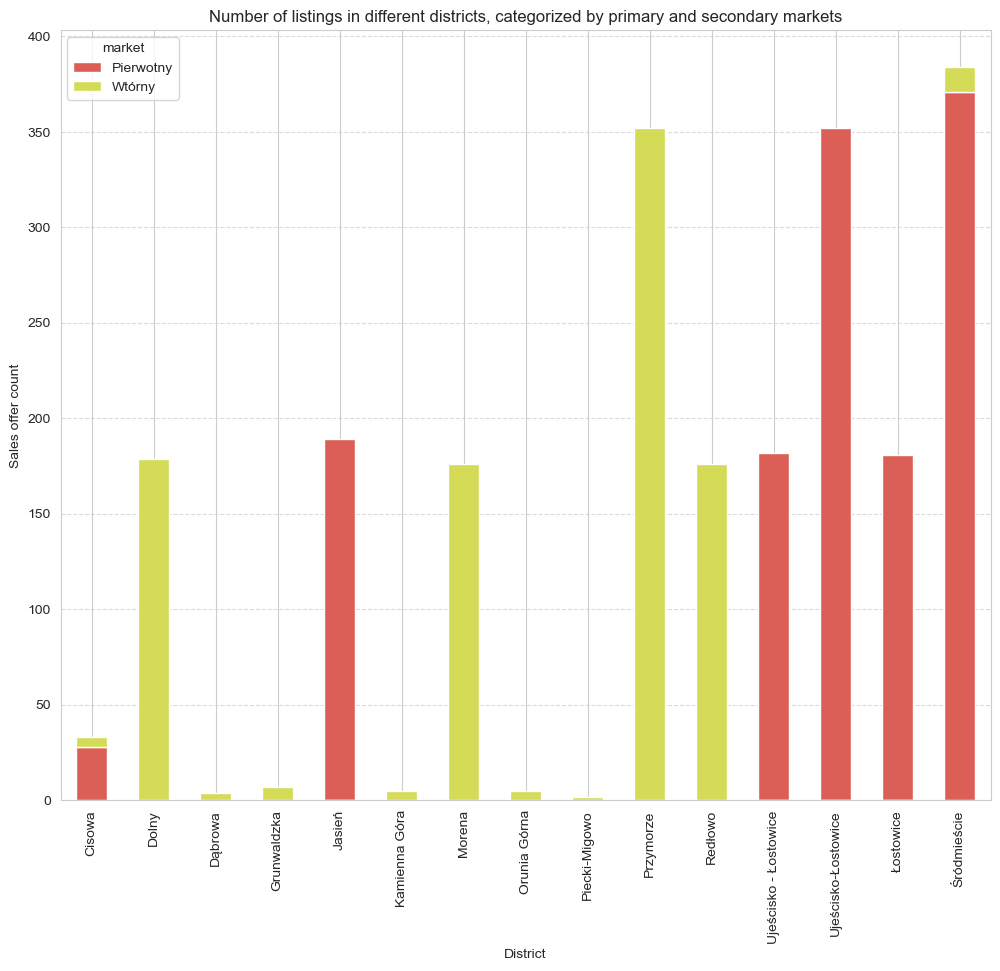

In [14]:
city_category_counts = df.groupby(['district', 'market']).size().unstack(fill_value=0)


city_category_counts.plot(kind='bar', stacked=True)


plt.title('Number of listings in different districts, categorized by primary and secondary markets')
plt.xlabel('District')
plt.ylabel('Sales offer count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

##### The district with the highest number of listings is mostly composed of new developments from the primary market (new real estate projects).

Text(0.5, 1.0, 'Comparison of the amounts of the sales offers categorized by the market type')

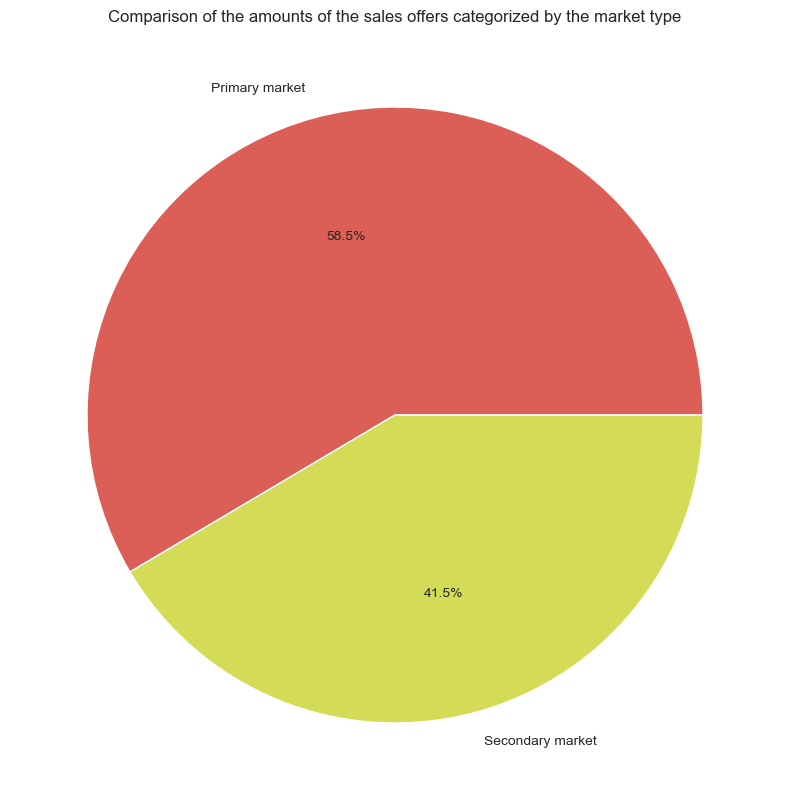

In [15]:
plt.pie(df['market'].value_counts(), labels=['Primary market', 'Secondary market'], autopct='%1.1f%%')
plt.title('Comparison of the amounts of the sales offers categorized by the market type')

##### In collected dataset we can see a slight advantage in the number of sales offers from the primary market.